# looking for tools on internet by joel barrantes

## Sentiment analysis

In [5]:
from transformers import pipeline

classifier = pipeline('sentiment-analysis', model='nlptown/bert-base-multilingual-uncased-sentiment')
classifier('Quiero opinar sobre el curso de IA y siento que fue el mejor y estoy muy feliz')


[{'label': '5 stars', 'score': 0.7074704766273499}]

## Object Detection

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


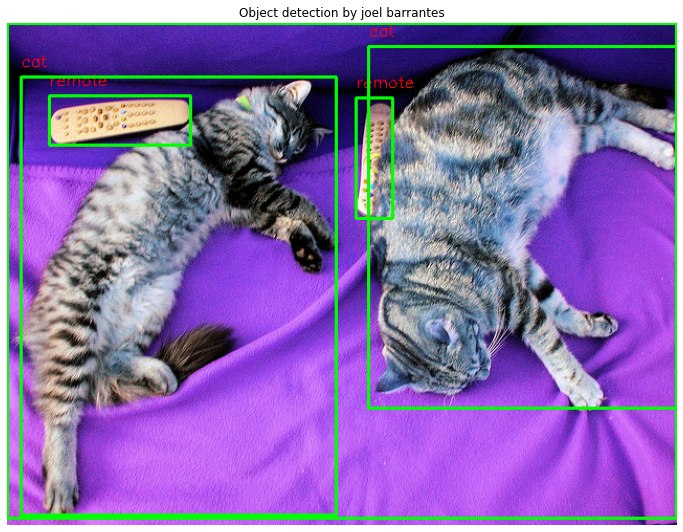

In [11]:
from PIL import Image
from transformers import pipeline
import numpy as np
import cv2
import matplotlib.pyplot as plt

image = Image.open("./imgs/photo-two-kittens.png")

object_detector = pipeline('object-detection', model='facebook/detr-resnet-50')
detections_coodinates = object_detector(image)


image = np.array(image)

# Dibujar un rectángulo alrededor de cada objeto detectado
for obj in detections_coodinates:
    xmin, ymin, xmax, ymax = obj['box'].values()
    cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0, 255, 0), thickness=2)
    label = obj['label']
    cv2.putText(image, label, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)

# Mostrar la imagen resultante en una notebook de Jupyter
plt.figure(figsize=(12, 12))
plt.title('Object detection by joel barrantes')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## Image classification

In [9]:
from transformers import pipeline

classifier = pipeline(task="image-classification")
preds = classifier(
    "./imgs/photo-two-kittens.png"
)
preds = [{"score": round(pred["score"], 4), "label": pred["label"]} for pred in preds]
print(*preds, sep="\n")

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 5dca96d (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.


{'score': 0.9374, 'label': 'Egyptian cat'}
{'score': 0.0384, 'label': 'tabby, tabby cat'}
{'score': 0.0144, 'label': 'tiger cat'}
{'score': 0.0033, 'label': 'lynx, catamount'}
{'score': 0.0007, 'label': 'Siamese cat, Siamese'}


## Image to Text

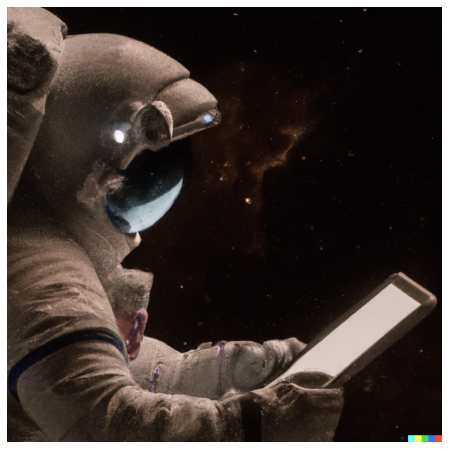

['a person holding a cell phone in their hand']

In [48]:
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer
import torch
from PIL import Image

model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)



max_length = 16
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}
def predict_step(image_paths):
  images = []
  for image_path in image_paths:
    i_image = Image.open(image_path)
    if i_image.mode != "RGB":
      i_image = i_image.convert(mode="RGB")

    images.append(i_image)

  pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
  pixel_values = pixel_values.to(device)

  output_ids = model.generate(pixel_values, **gen_kwargs)

  preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
  preds = [pred.strip() for pred in preds]
  return preds

image = Image.open("./Dall-E/space-man-studying.png")
image = np.array(image)
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

predict_step(['./Dall-E/space-man-studying.png'])

## Automatic Speech Recognition

In [1]:
from huggingsound import SpeechRecognitionModel

model = SpeechRecognitionModel("jonatasgrosman/wav2vec2-large-xlsr-53-english")
audio_paths = ["./audio/mlk.flac"]

transcriptions = model.transcribe(audio_paths)
print(transcriptions)

c:\Users\joel_\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


04/12/2023 02:20:01 - INFO - huggingsound.speech_recognition.model - Loading model...


100%|██████████| 1/1 [00:14<00:00, 14.35s/it]

[{'transcription': 'i have a dreambut one daythis nation will rise up and live out the true meaning of its treed', 'start_timestamps': [1320, 1380, 1400, 1440, 1540, 1580, 1600, 1660, 1680, 1720, 1800, 1920, 1960, 2080, 3660, 3720, 3760, 3800, 3960, 4000, 4040, 4080, 4120, 4260, 4320, 6320, 6340, 6440, 6520, 6560, 6660, 6780, 6900, 6960, 7020, 7100, 7200, 7280, 7400, 7440, 7540, 7680, 7760, 8080, 8200, 8260, 8300, 8400, 8520, 8600, 10080, 10120, 10160, 10200, 10260, 10380, 10440, 10460, 10500, 10580, 10620, 10680, 10760, 10800, 10820, 10880, 10900, 10940, 11020, 11120, 11160, 11200, 11240, 11300, 11360, 11420, 11500, 11520, 11560, 11580, 11640, 11660, 11700, 11760, 11800, 11860, 11880, 11960, 12040, 12160, 12240, 12400], 'end_timestamps': [1340, 1400, 1420, 1460, 1560, 1600, 1640, 1680, 1700, 1740, 1820, 1940, 1980, 2100, 3680, 3740, 3780, 3820, 3980, 4020, 4060, 4100, 4140, 4280, 4340, 6340, 6360, 6460, 6540, 6600, 6680, 6800, 6920, 6980, 7040, 7120, 7220, 7300, 7420, 7460, 7560, 7700